## Title: User Modeling System

### Introduction

Data modeling is one of the most powerful tools to analyze data and draw meaningful conclusions from it. To score well on a test, it is important that we use a method of study which has historically and scientifically been proven efficient. Is it better to study one night before the exam for an extended period of time or to distribute study sessions in intervals of 30-40 minutes over a couple of days?

We use the data set “uns_datatable.xls” which consists of students’ educational features such as study time, repetitions, exam performance in current and pre-requisite courses, etc. The goal is to establish a relationship between a student’s educational habits and conceptual understanding. 

In this study, we will be investigating two different predictor variables, study time for a given objective subject, represented by STG, and the frequency of study sessions for said subject, represented by SCG, along with how they correlate with our focus variable which will be the measuring stick of a study strategy's effectiveness, as represented by UNS, or knowledge level of a given subject. A list of around 200 observations with given UNS values will be used as an imported data frame, for training data.

### Preliminary exploratory data analysis:

First, we needed to import all of the libraries required for the research of our project:

In [41]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

Now we need to read in the required data, and wrangle it into a usable format. To do this, we need to first only read the first six columns, as the later columns are explanations of what the variable are and aren't actual data entries themselves. Also we only wish to use the training data 

In [42]:
knowledge <- read_excel("data/uns_datatable.xls", sheet = "Training_Data", range = cell_cols("A:F"))

To further wrangle our data into a usable format, we wish to convert the last row, with only a limited number of possible options, to a factor.

In [43]:
knowledge <- mutate(knowledge, UNS = as_factor(UNS))

Great, this data is tidy, each column contains one variable, each row contains one observation, and each cell contains one value. 

A simple legend is outlined below, to be easily referred to when more readable names are required by the various visualizations in the later steps of this project.

**Variable Legend:**

STG (The degree of study time for goal object materials)

SCG (The degree of repetition number of user for goal object materials)

STR (The degree of study time of user for related objects with goal object)

LPR (The exam performance of user for related objects with goal object)

PEG (The exam performance of user for goal objects)

UNS (The knowledge level of user)
     
Within this study, based on our chosen research question, we will actually only require usage of the following variables: the study time for the objective material (STG), the degree of repitition in the studying of said material (SCG), and the knowledge level of the person (UNS).

For preliminary explorations, first we we will investigate the distribution of people of various different knowledge levels in the data set. This is because if one group is significantly overrepresented, their data could be much more accurate than other groups, and when paired together may yield skewed results.

In [45]:
# knowledge_data_df %>% 
# group_by(UNS) %>% 
# summarize(n = n())

know_count <- nrow(knowledge)
    knowledge %>%
    group_by(UNS) %>%
    summarize(count = n(),
    percentage = n() / num_obs * 100)

ERROR: Error: Problem with `summarise()` input `percentage`.
[31m✖[39m object 'num_obs' not found
[34mℹ[39m Input `percentage` is `n()/num_obs * 100`.
[34mℹ[39m The error occurred in group 1: UNS = "very_low".


The result was a fairly even distribution for each category besides for those in the "very low" scores category. However, this is an acceptable weakness as scorers in the very low section are already expected to be rare, and have strange properties such as studying 0 hours, as long as the other categories are represented correctly, this outlier shouldn't be too serious.

Next, some plots were created to help visualize the data that is being explored.

These histograms were used to observe the distribution of our two predictor variables STG and SCG, both of which are already standardized values from 0 to 1.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



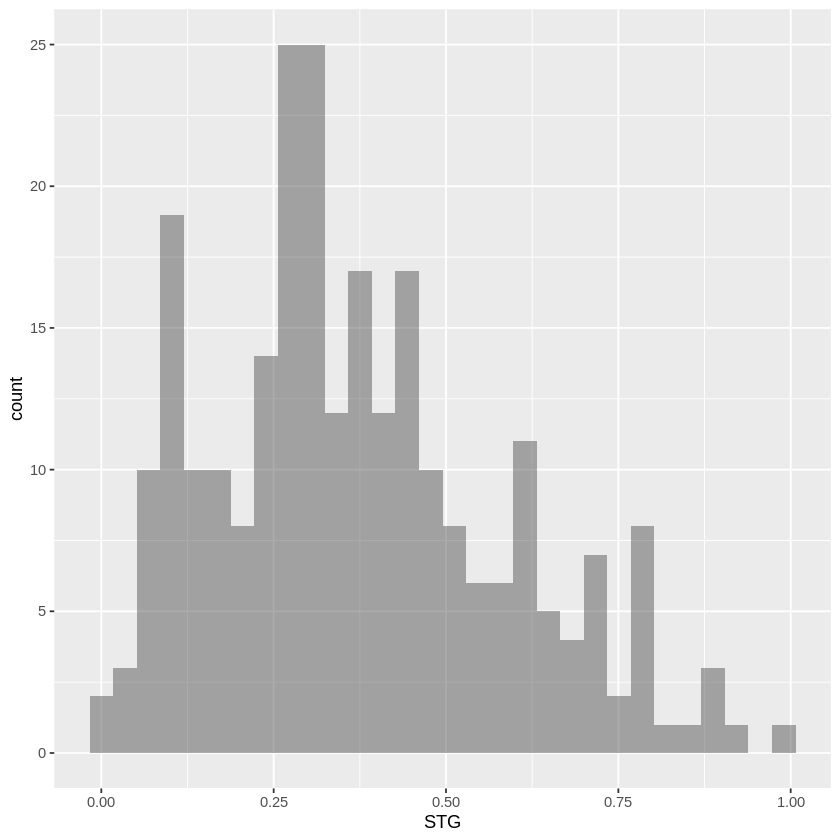

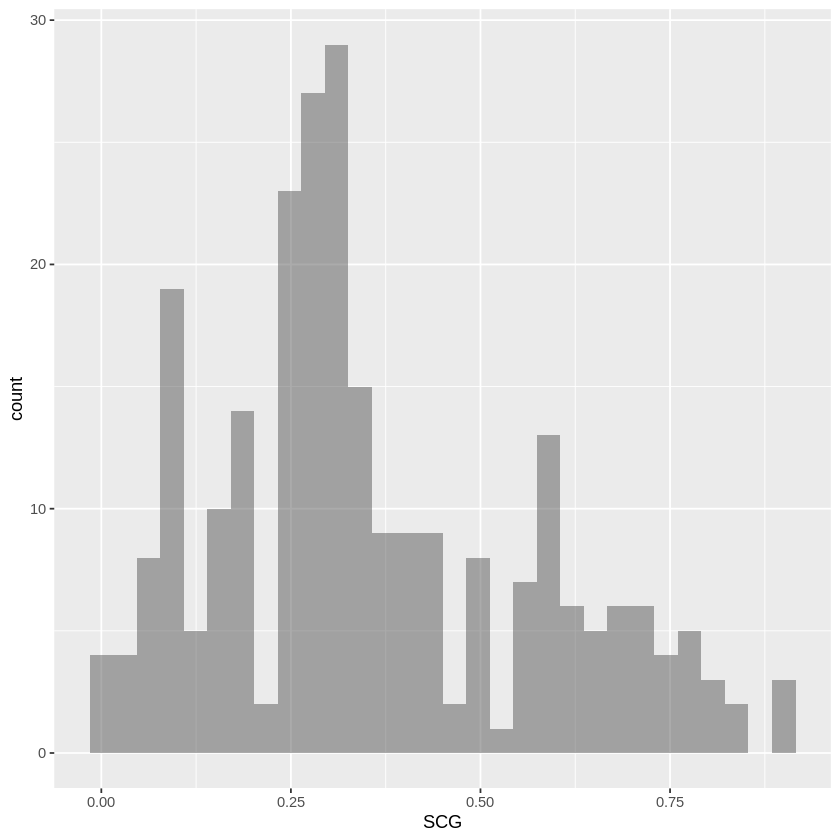

In [47]:

STG_hist <- ggplot(knowledge, aes(x = STG)) +
  geom_histogram(alpha = 0.5, position = "identity")

STG_hist

SCG_hist <- ggplot(knowledge, aes(x = SCG)) +
  geom_histogram(alpha = 0.5, position = "identity")

SCG_hist

